In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#load the dataset from kaggle using API
! kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

covid19-xray-dataset-train-test-sets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-xray-dataset-train-test-sets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Convolution2D,MaxPooling2D,Dropout,BatchNormalization
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
 # Replace with the directory path where your images are located
directory = '/content/xray_dataset_covid19/train/PNEUMONIA'

# Iterate through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extensions as per your images
        file_path = os.path.join(directory, filename)
        with Image.open(file_path) as img:
            width, height = img.size
            print(f"Image: {filename}, Size: {width}x{height}")


Image: 1-s2.0-S0140673620303706-fx1_lrg.jpg, Size: 2563x1148
Image: nejmoa2001191_f4.jpeg, Size: 1800x1439
Image: nCoV-radiol.2020200269.fig1-day7.jpeg, Size: 700x630
Image: 93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg, Size: 1592x1448
Image: auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg, Size: 882x876
Image: ryct.2020200028.fig1a.jpeg, Size: 3342x4095
Image: pneumocystis-pneumonia-2-PA.png, Size: 955x954
Image: nejmc2001573_f1b.jpeg, Size: 1652x1308
Image: C6EA0BE5-B01E-4113-B194-18D956675E25.jpeg, Size: 1989x1463
Image: 39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg, Size: 1727x1442
Image: nejmc2001573_f1a.jpeg, Size: 1645x1272
Image: 6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg, Size: 1992x1285
Image: 1-s2.0-S1684118220300608-main.pdf-001.jpg, Size: 477x411
Image: kjr-21-e24-g001-l-a.jpg, Size: 328x237
Image: all14238-fig-0001-m-b.jpg, Size: 629x708
Image: E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg, Size: 4248x3480
Image: F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg, Size:

In [ ]:
# Path to the image file
image_path = '/content/images/example.jpg'

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
#Data augumentation
train_datagen=ImageDataGenerator(

            rescale=1./255,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            fill_mode='nearest',
            horizontal_flip=True,
            vertical_flip=True

)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds=train_datagen.flow_from_directory(
    directory='/content/xray_dataset_covid19/train',
    class_mode='categorical',
    batch_size=32,
    target_size=(224,224)
)
test_ds=train_datagen.flow_from_directory(
    directory='/content/xray_dataset_covid19/test',
    class_mode='categorical',
    batch_size=32,
    target_size=(224,224)
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
#CNN model
model= Sequential()

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=128,activation ="relu"))
model.add(Dense(units=2,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    epochs=100,
    validation_data=test_ds,
    validation_steps=len(test_ds)
)

Epoch 1/100
5/5 [==============================] - 10s 2s/step - loss: 1.0852 - accuracy: 0.4595 - val_loss: 0.7502 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 3/100
5/5 [==============================] - 8s 2s/step - loss: 0.7185 - accuracy: 0.5000 - val_loss: 0.6780 - val_accuracy: 0.5000
Epoch 4/100
5/5 [==============================] - 8s 2s/step - loss: 0.6853 - accuracy: 0.5405 - val_loss: 0.6642 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.7310 - accuracy: 0.5000 - val_loss: 0.6570 - val_accuracy: 0.8750
Epoch 6/100
5/5 [==============================] - 8s 2s/step - loss: 0.6800 - accuracy: 0.6486 - val_loss: 0.6414 - val_accuracy: 0.9750
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.6574 - accuracy: 0.7703 - val_loss: 0.5755 - val_accuracy: 0.8750
Epoch 8/100
5/5 [================

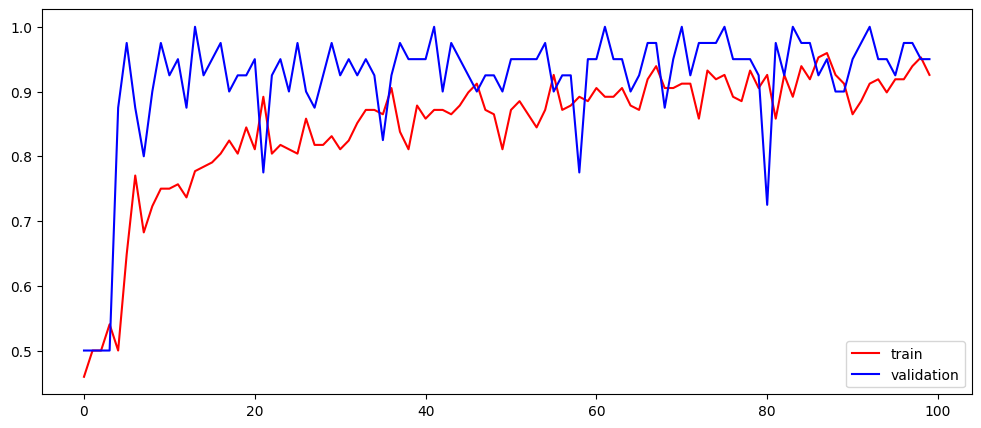

In [ ]:
#Training accuracy vs Validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

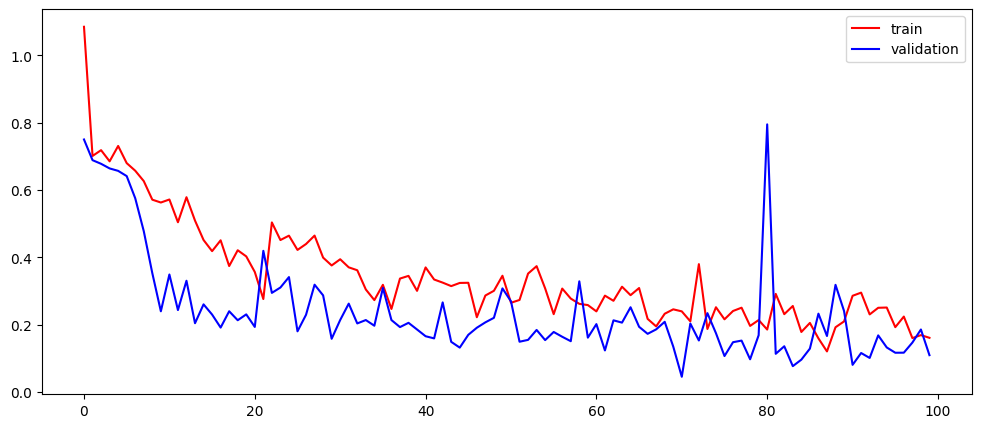

In [ ]:
#Training loss vs Validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#accuracy
model.evaluate(test_ds)

2/2 [==============================] - 2s 275ms/step - loss: 0.0625 - accuracy: 1.0000


[0.06247197836637497, 1.0]

In [ ]:
model.save('COVID_19_Model.h5')

In [ ]:
import cv2

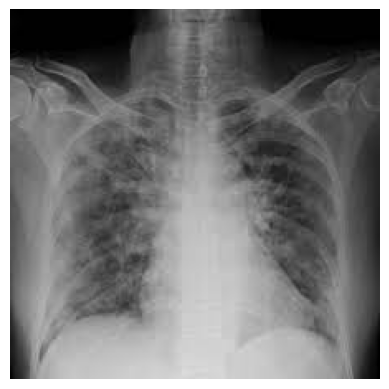

In [ ]:
test_image = cv2.imread('/content/test_6.jpg')
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [ ]:
import cv2

image = cv2.imread('/content/test_6.jpg')
image_shape = image.shape

print("Image shape:", image_shape)


Image shape: (224, 224, 3)


In [ ]:
image = cv2.resize(image,(224,224))

In [ ]:
test_input = image.reshape((1,224,224,3))

In [ ]:
output=model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


In [ ]:
if output[0][0] > output[0][1]:
    print("Normal")
else:
    print("Pneumonia")

Pneumonia
